In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Data Cleaning

In [2]:
skill = pd.read_excel('raw data/analystskills.xlsx')
profile = pd.read_excel('raw data/proxycurl_complete_5655.xlsx', sheet_name='EmptyRemoved')

# drop rows with missing user_id
skill = skill.dropna(subset=['user_id'])
profile = profile.dropna(subset=['user_id'])

# delete unnecessary columns
skill = skill[['user_id','skill_k50']]
profile = profile.drop(['analys','id','country'],axis=1)

skill['user_id'].nunique(), profile['user_id'].nunique()

(3645, 5153)

In [3]:
profile.isna().sum()

user_id                  0
languages                0
num of languages         0
summary               2779
education              369
num of education         0
experiences              4
num of experiences       0
dtype: int64

In [32]:
1-2279/3645


0.3747599451303155

In [4]:
profile.fillna(value="blank",inplace=True)

#### One-hot encoding on skills

In [5]:
# One-hot encoding
skill_dummy = pd.get_dummies(skill[['user_id','skill_k50']], columns=['skill_k50'])          # True/False for each skill
skill_dummy = skill_dummy.groupby('user_id').max().reset_index().astype(int)                 # one-hot encoding for each user
print(skill_dummy.shape)
skill_dummy.head()

(3645, 51)


,user_id,skill_k50_accounting / financial reporting / auditing,skill_k50_analysis / financial analysis / finance,skill_k50_autocad / solidworks / mechanical engineering,skill_k50_banking / insurance / credit,skill_k50_biotechnology / life sciences / chemistry,skill_k50_business analysis / change management / integration,skill_k50_coaching / leadership development / organizational development,skill_k50_customer relations / excel / planning,skill_k50_customer satisfaction / automotive / customer experience,...,skill_k50_retail / forecasting / merchandising,skill_k50_sap / software documentation / erp,skill_k50_security / first aid / emergency management,skill_k50_social media / social networking / facebook,skill_k50_sql / linux / software development,skill_k50_strategic planning / team leadership / sales,skill_k50_telecommunications / network security / cisco technologies,skill_k50_testing / quality assurance / sharepoint,skill_k50_video production / video editing / video,skill_k50_windows / networking / troubleshooting
0,1033137,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1098586,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1115736,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1341457,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1501168,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### skewness of skill

In [34]:
proportions = skill_dummy.drop(['user_id'], axis=1).mean()
# proportions.head()
# sort the skills by the proportion of users who have them
proportions.sort_values(ascending=False, inplace=True)
proportions.head()

skill_k50_analysis / financial analysis / finance                    0.902332
skill_k50_management / microsoft office / customer service           0.435665
skill_k50_strategic planning / team leadership / sales               0.415089
skill_k50_public speaking / research / teaching                      0.207682
skill_k50_marketing / marketing strategy / social media marketing    0.198628
dtype: float64

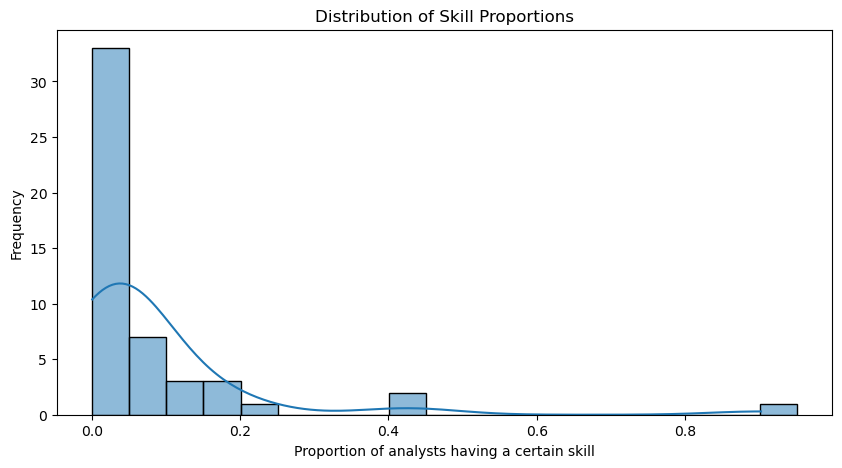

In [27]:
# plot the distribution of the proportions
plt.figure(figsize=(10, 5))
sns.histplot(proportions, kde=True, binwidth=0.05)  # using histplot as distplot is deprecated
plt.xlabel('Proportion of analysts having a certain skill')
plt.ylabel('Frequency')
plt.title('Distribution of Skill Proportions')
plt.show()

In [6]:
# # correlation between skills
# corr = skill_dummy.drop('user_id', axis=1).corr()
# plt.figure(figsize=(12,10))
# sns.heatmap(corr, cmap='coolwarm')
# plt.title('Correlation between skills')
# plt.show()

#### Merge into one data

In [7]:
profile.columns

Index(['user_id', 'languages', 'num of languages', 'summary', 'education',
       'num of education', 'experiences', 'num of experiences'],
      dtype='object')

In [8]:
# Merge numconnections with profile
# numconnections = skill[['user_id','numconnections']].drop_duplicates()
# data = pd.merge(profile, numconnections, on='user_id', how='right')
# Merge skill_dummy with profile
data = pd.merge(profile, skill_dummy, on='user_id', how='right')
data = data.dropna(how='any',axis=0, subset=profile.columns)

print(data.shape)
data.head(1)

(3388, 58)


,user_id,languages,num of languages,summary,education,num of education,experiences,num of experiences,skill_k50_accounting / financial reporting / auditing,skill_k50_analysis / financial analysis / finance,...,skill_k50_retail / forecasting / merchandising,skill_k50_sap / software documentation / erp,skill_k50_security / first aid / emergency management,skill_k50_social media / social networking / facebook,skill_k50_sql / linux / software development,skill_k50_strategic planning / team leadership / sales,skill_k50_telecommunications / network security / cisco technologies,skill_k50_testing / quality assurance / sharepoint,skill_k50_video production / video editing / video,skill_k50_windows / networking / troubleshooting
0,1033137,"['English', 'Spanish']",2.0,Director of biopharma equity research and publ...,NYU Stern School of Business\nMaster of Busine...,3.0,Evercore : Director - Biotechnology & Pharmace...,6.0,1,1,...,0,0,0,0,0,1,0,1,0,0


check na

<Axes: >

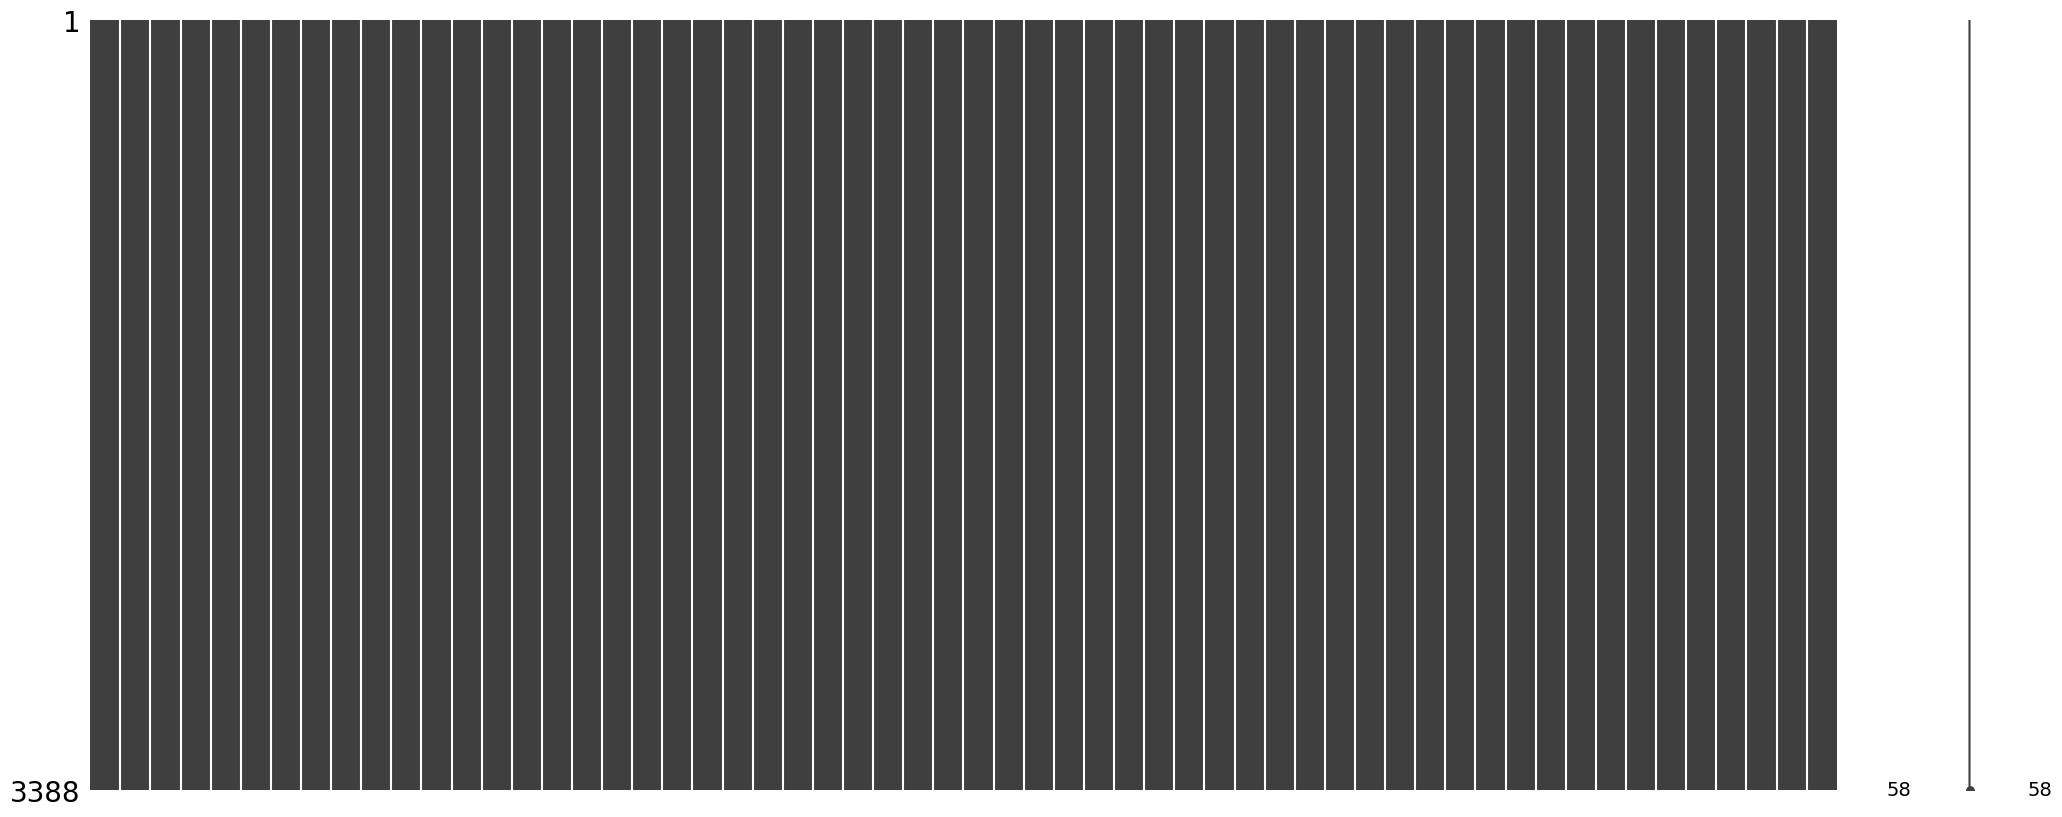

In [9]:
import missingno
missingno.matrix(data)

In [10]:
data.isna().sum().sum()

0

In [11]:
data.iloc[:,:8].head(1)

,user_id,languages,num of languages,summary,education,num of education,experiences,num of experiences
0,1033137,"['English', 'Spanish']",2.0,Director of biopharma equity research and publ...,NYU Stern School of Business\nMaster of Busine...,3.0,Evercore : Director - Biotechnology & Pharmace...,6.0


### EDA

In [28]:
data['num of languages'].mean()


0.40731995277449823

In [30]:
data['num of education'].mean()

2.0056080283353013

In [31]:
data['num of experiences'].mean()

6.392266824085006

### Combine all into text, for Roberta

In [12]:
# Define a function to combine the columns
def combine_columns(row):
    return f"summary: {row['summary']};"\
           f"languages: {row['languages']}; num of languages: {row['num of languages']}; " \
           f"education: {row['education']}; num of education: {row['num of education']}; "\
           f"experiences: {row['experiences']}; num of experiences: {row['num of experiences']};"

output = data.copy() 
output['combined_text'] = output.apply(lambda row: combine_columns(row), axis=1)
output= output.drop([ 'languages', 'num of languages', 'summary', 'education',
       'num of education', 'experiences', 'num of experiences'],axis=1)
print(output.shape)
# output.to_csv('processed data/all_combined.csv',index=False)
output.head(3)

(3388, 52)


,user_id,skill_k50_accounting / financial reporting / auditing,skill_k50_analysis / financial analysis / finance,skill_k50_autocad / solidworks / mechanical engineering,skill_k50_banking / insurance / credit,skill_k50_biotechnology / life sciences / chemistry,skill_k50_business analysis / change management / integration,skill_k50_coaching / leadership development / organizational development,skill_k50_customer relations / excel / planning,skill_k50_customer satisfaction / automotive / customer experience,...,skill_k50_sap / software documentation / erp,skill_k50_security / first aid / emergency management,skill_k50_social media / social networking / facebook,skill_k50_sql / linux / software development,skill_k50_strategic planning / team leadership / sales,skill_k50_telecommunications / network security / cisco technologies,skill_k50_testing / quality assurance / sharepoint,skill_k50_video production / video editing / video,skill_k50_windows / networking / troubleshooting,combined_text
0,1033137,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,summary: Director of biopharma equity research...
1,1098586,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,summary: blank;languages: []; num of languages...
2,1115736,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,summary: I am the CEO of JLab. We are the fast...


Combine summary, education, experience only, for RF

In [14]:
temp_df = data.copy() 

import ast
temp_df['languages']=temp_df['languages'].apply(ast.literal_eval)

temp_df.head(1)

,user_id,languages,num of languages,summary,education,num of education,experiences,num of experiences,skill_k50_accounting / financial reporting / auditing,skill_k50_analysis / financial analysis / finance,...,skill_k50_retail / forecasting / merchandising,skill_k50_sap / software documentation / erp,skill_k50_security / first aid / emergency management,skill_k50_social media / social networking / facebook,skill_k50_sql / linux / software development,skill_k50_strategic planning / team leadership / sales,skill_k50_telecommunications / network security / cisco technologies,skill_k50_testing / quality assurance / sharepoint,skill_k50_video production / video editing / video,skill_k50_windows / networking / troubleshooting
0,1033137,"[English, Spanish]",2.0,Director of biopharma equity research and publ...,NYU Stern School of Business\nMaster of Busine...,3.0,Evercore : Director - Biotechnology & Pharmace...,6.0,1,1,...,0,0,0,0,0,1,0,1,0,0


In [15]:
def normalize_language(lang):
    lang = lang.lower().strip()# Standardize the language string
    lang = ' '.join(lang.split()) # Replace multiple spaces with a single space
    # Normalize variations of Chinese Mandarin
    if 'mandarin' in lang :
        return 'chinese mandarin'
    elif 'cantonese' in lang:
        return 'chinese cantonese'
    elif 'engish' in lang or 'english' in lang:
        return 'english'
    elif 'espanhol' in lang or 'espanol' in lang or 'español' in lang or 'spanish' in lang:
        return 'spanish'
    elif 'inglés' in lang or 'inglês' in lang:
        return 'english'
    elif 'french' in lang:
        return 'french'
    elif 'italiano' in lang:
        return 'italian'
    elif 'português' in lang or 'portuguese' in lang:
        return 'portuguese'
    elif 'very basic czech' in lang:
        return 'czech'
    return lang

# Normalize the language lists
temp_df['languages'] = temp_df['languages'].apply(lambda langs: [normalize_language(lang) for lang in langs])
# Explode the DataFrame
language_explod = temp_df['languages'].explode()

# Clean and split operations
language_explod = language_explod.str.lower().replace(r"\(.*?\)|[';\)-]", "", regex=True).str.strip()
language_explod = language_explod.str.split(',').explode()
language_explod = language_explod.str.strip()

# Optionally, remove any empty or unwanted strings
language_explod = language_explod[language_explod != '']
language_explod = language_explod.replace("some", "")
# Optionally, remove empty strings
language_explod = language_explod[language_explod != '']
# One-hot encode the cleaned languages
language_encoded = pd.get_dummies(language_explod,prefix='language').groupby(level=0).sum()

# Display the first row of the encoded DataFrame
language_encoded.head(1)


,language_afrikaans,language_american,language_american sign language,language_amharic,language_ancient greek,language_arabic,language_bahasa malaysia,language_bengali,language_bloomberg,language_bulgarian,...,language_tagalog,language_taiwanese,language_tamil,language_telugu,language_thai,language_tigrinya,language_turkish,language_ukrainian,language_urdu,language_vietnamese
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
language_encoded1 = pd.get_dummies(language_explod).groupby(level=0).sum()
language_encoded1.columns

Index(['afrikaans', 'american', 'american sign language', 'amharic',
       'ancient greek', 'arabic', 'bahasa malaysia', 'bengali', 'bloomberg',
       'bulgarian', 'catalan', 'chinese', 'chinese cantonese',
       'chinese mandarin', 'czech', 'dutch', 'english', 'estonian', 'excel',
       'farsi', 'french', 'german', 'greek', 'gujarati', 'hakka', 'hebrew',
       'hindi', 'hokkien', 'hungarian', 'indonesian', 'italian', 'japanese',
       'kannada', 'karachaybalkar', 'korean', 'latin', 'marathi', 'norwegian',
       'papiamento', 'persian', 'polish', 'portuguese', 'punjabi', 'russian',
       'serbocroatian', 'sindhi', 'slovak', 'spanish', 'swedish', 'tagalog',
       'taiwanese', 'tamil', 'telugu', 'thai', 'tigrinya', 'turkish',
       'ukrainian', 'urdu', 'vietnamese'],
      dtype='object')

In [19]:
# sort the languages by frequency
language_encoded1.sum().sort_values(ascending=False).head(5)

english    485
spanish    230
french     144
german      73
chinese     66
dtype: int64

In [336]:
1 + 7 +50+1+59

118

In [20]:

result_df = temp_df.join(language_encoded.groupby(level=0).sum())

def combine_some_columns(row):
        return f"summary: {row['summary']};"\
           f"education: {row['education']};"\
           f"experiences: {row['experiences']};"
result_df['combined_text'] = result_df.apply(lambda row: combine_some_columns(row), axis=1)


result_df.head()

,user_id,languages,num of languages,summary,education,num of education,experiences,num of experiences,skill_k50_accounting / financial reporting / auditing,skill_k50_analysis / financial analysis / finance,...,language_taiwanese,language_tamil,language_telugu,language_thai,language_tigrinya,language_turkish,language_ukrainian,language_urdu,language_vietnamese,combined_text
0,1033137,"[english, spanish]",2.0,Director of biopharma equity research and publ...,NYU Stern School of Business\nMaster of Busine...,3.0,Evercore : Director - Biotechnology & Pharmace...,6.0,1,1,...,0,0,0,0,0,0,0,0,0,summary: Director of biopharma equity research...
1,1098586,[],0.0,blank,Fordham Gabelli School of Business\nMaster of ...,1.0,- : Research Analyst\nNone.-.\nNo description\...,3.0,0,1,...,0,0,0,0,0,0,0,0,0,summary: blank;education: Fordham Gabelli Scho...
2,1115736,[],0.0,I am the CEO of JLab. We are the fastest growi...,University of Oklahoma\nNA : NA\n1995-1999\n\n...,2.0,JLab Audio : President\n2011.11-.\nNo descript...,7.0,0,0,...,0,0,0,0,0,0,0,0,0,summary: I am the CEO of JLab. We are the fast...
3,1341457,[],0.0,I offer ~20 years’ experience on the evolution...,University of Wisconsin-Madison\nBBA : Finance...,3.0,SLR Capital Partners : Partner\n2023.1-.\nNo d...,6.0,0,1,...,0,0,0,0,0,0,0,0,0,summary: I offer ~20 years’ experience on the ...
4,1501168,[],0.0,We specialize in providing long-term financial...,University of Arkansas\nBachelor of Science (B...,1.0,"Boston Mountain Money Management, Inc. : Princ...",4.0,1,1,...,0,0,0,0,0,0,0,0,0,summary: We specialize in providing long-term ...


In [21]:
result_df.shape

(3388, 118)

In [22]:
for col in result_df.columns:
    print(col)

user_id
languages
num of languages
summary
education
num of education
experiences
num of experiences
skill_k50_accounting / financial reporting / auditing
skill_k50_analysis / financial analysis / finance
skill_k50_autocad / solidworks / mechanical engineering
skill_k50_banking / insurance / credit
skill_k50_biotechnology / life sciences / chemistry
skill_k50_business analysis / change management / integration
skill_k50_coaching / leadership development / organizational development
skill_k50_customer relations / excel / planning
skill_k50_customer satisfaction / automotive / customer experience
skill_k50_data analysis / databases / data warehousing
skill_k50_energy / environmental awareness / renewable energy
skill_k50_engineering / project engineering / gas
skill_k50_english / spanish / french
skill_k50_estrategia empresarial / liderazgo de equipos / planificación estratégica
skill_k50_gestion de projet / anglais / service client
skill_k50_healthcare / hospitals / healthcare managemen

In [344]:
# result_df.to_csv('processed data/mix_combined.csv',index=False)

# 2. Feature Engineering

## 2.2 languages

In [11]:
data['languages'].value_counts()

languages
[]                                  2643
['English']                          128
['English', 'Spanish']                66
['Spanish']                           50
['French']                            34
                                    ... 
['English', 'French', 'Turkish']       1
['Vietnamese']                         1
['French', 'Korean']                   1
['Cantonese', 'English']               1
['English', 'Farsi', 'Spanish']        1
Name: count, Length: 229, dtype: int64

Create a new binary column 'lan_English' to indicate if 'English' is in the list of languages

In [12]:

import ast
# Convert float values to empty lists and strings to lists of strings
data['languages'] = data['languages'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))

# Create a new binary column 'lan_English' to indicate if 'English' is in the list of languages
data['lan_English'] = data['languages'].apply(lambda x: 'English' in x).astype(int)

# To see the distribution of the new column
print(data['lan_English'].value_counts())


lan_English
0    3174
1     471
Name: count, dtype: int64


### Binning num of languages

In [13]:
data['num of languages'].value_counts()

num of languages
0    2900
1     325
2     277
3      92
4      36
5      10
6       4
7       1
Name: count, dtype: int64

In [14]:

# Define the bins and labels
bins = [-1, 0, 1, 2, float('inf')]  # -1 for 0 languages, inf for more than 2 languages
labels = ['0 languages', '1 language', '2 languages', 'More than 2 languages']

# Bin the 'num of languages' column and create a new 'languages_category' column
data['num_of_lanuages_bin'] = pd.cut(data['num of languages'], bins=bins, labels=labels, right=False)

# Check the distribution of the new column
print(data['num_of_lanuages_bin'].value_counts())


num_of_lanuages_bin
1 language               2900
More than 2 languages     420
2 languages               325
0 languages                 0
Name: count, dtype: int64


## 2.3 Experience

Calculate the total working experience in year

In [62]:
from datetime import datetime
import re

# Define the function to parse dates from experience text
def parse_dates(text):
    # Regular expression to find date ranges like '2020.7-2022.12' or '2022.12-.'
    date_ranges = re.findall(r'(\d{4}\.\d{1,2})-(\d{4}\.\d{1,2}|.)?', text)
    
    date_pairs = []
    for start, end in date_ranges:
        start_date = datetime.strptime(start, "%Y.%m")
        if end == '.' or end == '':  # Ongoing job, no end date specified  
            end_date = datetime.now()  # Use current time as end date
        else:
            try:
                end_date = datetime.strptime(end, "%Y.%m")
            except ValueError:
                continue
        date_pairs.append((start_date, end_date))
    return date_pairs

# Define the function to calculate duration in months from date pairs
def calculate_durations(date_pairs):
    durations = []
    for start, end in date_pairs:
        month_difference = (end.year - start.year) * 12 + (end.month - start.month)
        durations.append(month_difference)
    return sum(durations)


# Define a function to calculate total work duration from experience text
def total_experience(text):
    try:
        if isinstance(text, str):
            date_pairs = parse_dates(text)
            total_months = calculate_durations(date_pairs)
            return total_months / 12  # Convert months to years
        return np.nan  # Return NaN for non-string inputs
    except:
        print(text)

# Apply the function to calculate total work experience for each user
data['total_experience_years'] = data['experiences'].apply(total_experience)
data.head(1)



,user_id,country,languages,num of languages,summary,education,num of education,experiences,num of experiences,numconnections,...,skill_k50_social media / social networking / facebook,skill_k50_sql / linux / software development,skill_k50_strategic planning / team leadership / sales,skill_k50_telecommunications / network security / cisco technologies,skill_k50_testing / quality assurance / sharepoint,skill_k50_video production / video editing / video,skill_k50_windows / networking / troubleshooting,lan_English,num_of_lanuages_bin,total_experience_years
0,603166448,US,"[English, Portuguese, Spanish]",3,NaN,Rutgers Business School\nBachelor's degree : F...,2,Goldman Sachs : Associate\n2022.12-.\nNo descr...,5,500.0,...,0,0,0,0,0,0,0,1,More than 2 languages,4.25


In [52]:
data['experiences'].isna().sum(), data['total_experience_years'].isna().sum()

(258, 258)

# 3. Initial Model - Random Forest

In [54]:
y = skill_dummy.drop('user_id', axis=1)
X = data[['num of languages','num of education','num of experiences','numconnections',
            # 'country',
            'lan_English','num_of_lanuages_bin','total_experience_years'
            ]]

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# from category_encoders import CountEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

binary_columns = ['lan_English']
numerical_columns = ['num of languages','num of education','num of experiences','numconnections',]

onehot = OneHotEncoder(
    categories = [
            ['0 languages', '1 language', '2 languages', 'More than 2 languages'], # num of languages binned
    ],
    handle_unknown = 'ignore',  # <- Ignore unknown values (i.e. don't create a column for them)
)
onehot_columns = ['num_of_lanuages_bin']


preprocessor = ColumnTransformer(
    # (nickname, transformer to apply, columns to apply to)
    transformers=[
        ('binary', 'passthrough', binary_columns),
        ('num', StandardScaler(), numerical_columns),
        ('onehot', onehot, onehot_columns),
    ],
)


forest = RandomForestClassifier(n_estimators=10, random_state=42)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', multi_target_forest)
])

model.fit(X_train, y_train)
sample_prediction = model.predict(X_test[:1])
X.shape, y.shape, sample_prediction

((3645, 7),
 (3645, 50),
 array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0]]))

In [72]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.13717421124828533


In [73]:
# Feature importance
feature_names = preprocessor.get_feature_names_out()
feature_importances = multi_target_forest.estimators_[0].feature_importances_

features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame based on the importance score
features_df.sort_values(by='Importance', ascending=False, inplace=True)
features_df


,Feature,Importance
4,num__numconnections,0.591559
3,num__num of experiences,0.241757
2,num__num of education,0.099491
1,num__num of languages,0.033638
0,binary__lan_English,0.018742
6,onehot__num_of_lanuages_bin_1 language,0.006530
7,onehot__num_of_lanuages_bin_2 languages,0.005216
8,onehot__num_of_lanuages_bin_More than 2 languages,0.003066
5,onehot__num_of_lanuages_bin_0 languages,0.000000
